In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df= pd.read_csv('Data01.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [9]:
df = df.drop(['CustomerID','Gender'],1)

In [10]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [11]:
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns=['Age','Annual Income (k$)','Spending Score (1-100)'])
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [12]:
df_scaled.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [13]:
df_scaled[np.abs(df_scaled['Annual Income (k$)']) >3]

,Age,Annual Income (k$),Spending Score (1-100)


*There were no null values and all the data dtypes were inline with data

*no presence of zero's were observed in data and observed five point summary of each feature

*dropped customer id as it adds redundancy to the model.

*There is not much difference observed in the data, it can be dropped for further analysis.

*Then scaled the data to bring all features to neautral units

*there were no presence of outliers

## Kmeans

In [14]:
kmeans = KMeans()

finding optimal K value

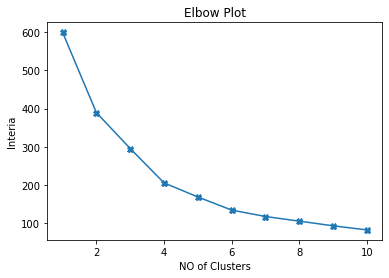

In [16]:
err = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(df_scaled)
    model.inertia_
    err.append(model.inertia_)
    
plt.plot(range(1,11),err,marker='X')
plt.xlabel('NO of Clusters')
plt.ylabel('Interia')
plt.title('Elbow Plot')
plt.show()

silhouette_analysis

In [17]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(df_scaled)
    sil_score = silhouette_score(df_scaled,kmeans.labels_)
    print('The silhouette_score for', i , 'clusters is', sil_score)

The silhouette_score for 2 clusters is 0.33547192894004574
The silhouette_score for 3 clusters is 0.357793388710272
The silhouette_score for 4 clusters is 0.4039582785148566
The silhouette_score for 5 clusters is 0.41664341513732767
The silhouette_score for 6 clusters is 0.42742814991580175
The silhouette_score for 7 clusters is 0.417231894954916
The silhouette_score for 8 clusters is 0.4080836820857703
The silhouette_score for 9 clusters is 0.3913529293921474


In [18]:
kmeans = KMeans(n_clusters=4,random_state=100)  #taking k=4
model4 = kmeans.fit(df_scaled)
lables4 = model4.labels_
df_4 = df_scaled.copy()
df_4['labels'] = lables4

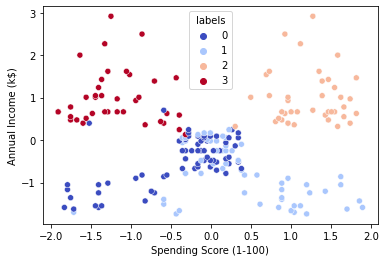

In [19]:
sns.scatterplot('Spending Score (1-100)','Annual Income (k$)',hue='labels',data=df_4,palette='coolwarm')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=6,random_state=100) #k=6
model6 = kmeans.fit(df_scaled)
lables6 = model6.labels_
df_6 = df_scaled.copy()
df_6['labels'] = lables6

In [21]:
df_6.head()

,Age,Annual Income (k$),Spending Score (1-100),labels
0,-1.424569,-1.738999,-0.434801,3
1,-1.281035,-1.738999,1.195704,3
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,3
4,-0.563369,-1.662660,-0.395980,1


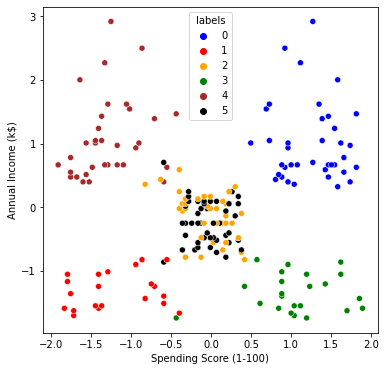

In [25]:
plt.figure(figsize=(6,6))
sns.scatterplot('Spending Score (1-100)','Annual Income (k$)',hue='labels',data=df_6,palette=['blue','red','orange','green','brown','black'])
plt.show()

In [23]:
kmeans = KMeans(n_clusters=5,random_state=100) #k=5
model5 = kmeans.fit(df_scaled)
lables5 = model5.labels_
df_5 = df_scaled.copy()
df_5['labels'] = lables5

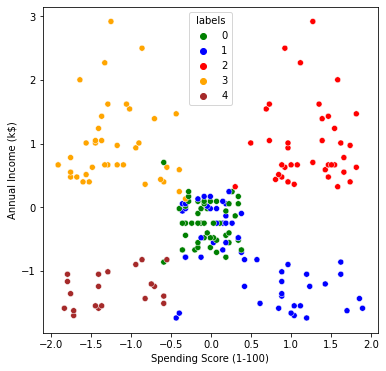

In [26]:
plt.figure(figsize=(6,6))
sns.scatterplot('Spending Score (1-100)','Annual Income (k$)',hue='labels',data=df_5,palette=['green','blue','red','orange','brown'])
plt.show()

Comparing k 4,5 and 6 ,and see that k = 6 the clusters are more clear and less overlaping.

2 clusters are overlaped but 4 Clusters are clearly seperated.

Our main and easy target would be cluster Blue[3] i.e High income and low spending score.

1st clustrer - Low income , low spending -
           Reward points on purchase , 
           EMI facility to retain the customers.
           We can provide some Discounts , 
           
           
2nd Cluster - Low Income , High Spending
          Update the Membership
          Reward Points
          Send out sales offer messages
          
3rd cluster , 4th Cluster - Average Income , Average Spending.
Max can provide EMI facility, Rewward points

5th cluster - High Income , Low spending -
          These are our Targeted customers.
          Take feedbacks and concetrate on the points mentioned by them.
          Improve Branded items
          Seperate section for Branded things.
          Include Online shopping and Home delivery
          
6th Cluster - High Income , High Spending -
         These are our Imp customers
         Prioritize their billing
         Include gift hampers for billing more than certain amount.
         Special offers to these Imp Customers on sepcific days.